<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/LogisticRegressionTLv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression (TensorFlow v2)

Import modules

In [ ]:
import tensorflow as tf
import numpy as np

Load and prepare the MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


Plot MNIST data

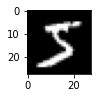

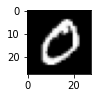

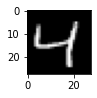

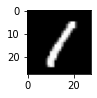

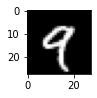

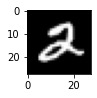

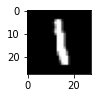

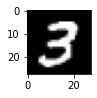

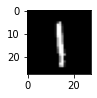

[5 0 4 1 9 2 1 3 1]


In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

print(y_train[0:9])

Data preprocessing

In [ ]:
from re import X
# Convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

print(x_train.dtype)
print(x_train.shape)

float32
(60000, 784)


Setup hyperparameters

In [ ]:
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

Shuffle and batch the data

In [ ]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

Initialize weights and biases

In [ ]:
# Weight of shape [784, 10], the 28*28 image features, and a total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

Define logistic regression and cost function

In [ ]:
# Logistic regression (Wx + b).
def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

Define optimizer and accuracy metrics

In [ ]:
# Accuracy metric.
def accuracy(y_pred, y_true):
  
  # Predicted class is the index of the highest score in prediction vector (i.e. argmax).
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

Optimization process

In [ ]:
# Optimization process. 
def run_optimization(x, y):
  # Wrap computation inside a GradientTape for automatic differentiation.
  
  with tf.GradientTape() as g:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)
    
    # Compute gradients
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

Training loop

In [ ]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  # Run the optimization to update W and b values.
  run_optimization(batch_x, batch_y)
  
  if step % display_step == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 810.052002, accuracy: 0.699219
step: 100, loss: 106.569565, accuracy: 0.882812
step: 150, loss: 185.743668, accuracy: 0.824219
step: 200, loss: 176.991440, accuracy: 0.824219
step: 250, loss: 82.616898, accuracy: 0.898438
step: 300, loss: 60.066162, accuracy: 0.937500
step: 350, loss: 81.952957, accuracy: 0.910156
step: 400, loss: 76.410530, accuracy: 0.921875
step: 450, loss: 71.772339, accuracy: 0.941406
step: 500, loss: 91.599495, accuracy: 0.921875
step: 550, loss: 57.654224, accuracy: 0.933594
step: 600, loss: 102.996361, accuracy: 0.878906
step: 650, loss: 83.158081, accuracy: 0.910156
step: 700, loss: 51.964233, accuracy: 0.941406
step: 750, loss: 98.502892, accuracy: 0.906250
step: 800, loss: 169.689270, accuracy: 0.875000
step: 850, loss: 60.342148, accuracy: 0.929688
step: 900, loss: 103.038933, accuracy: 0.902344
step: 950, loss: 47.381615, accuracy: 0.953125
step: 1000, loss: 107.484024, accuracy: 0.871094


Prediction to test model accuracy

In [ ]:
# Test model on validation set.

pred = logistic_regression(x_test)

print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.888300
